Business Understanding: Objective -> Predict Income => 50k or < 50k

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [ ]:
# load database
FILE_PATH = "adult.csv"
df = pd.read_csv(FILE_PATH)
df 

Data Understanding(EDA)

In [ ]:
# data summary
df.info()

In [ ]:
#create column names
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head()

In [ ]:
# data description
df.describe()

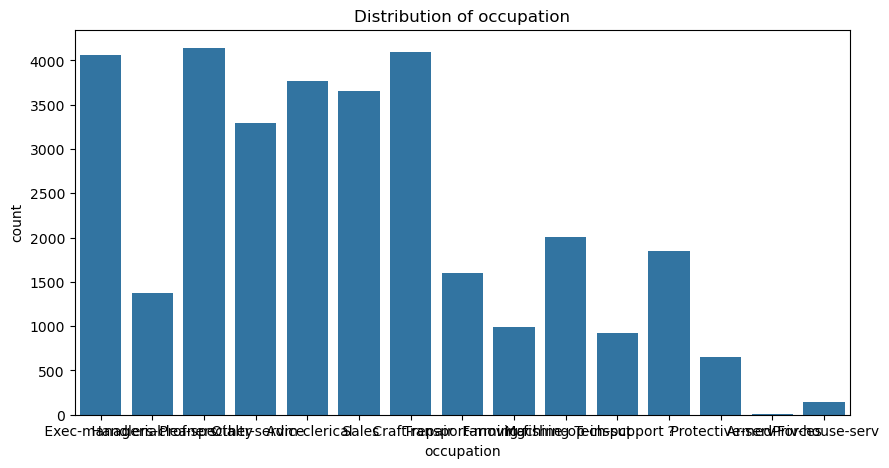

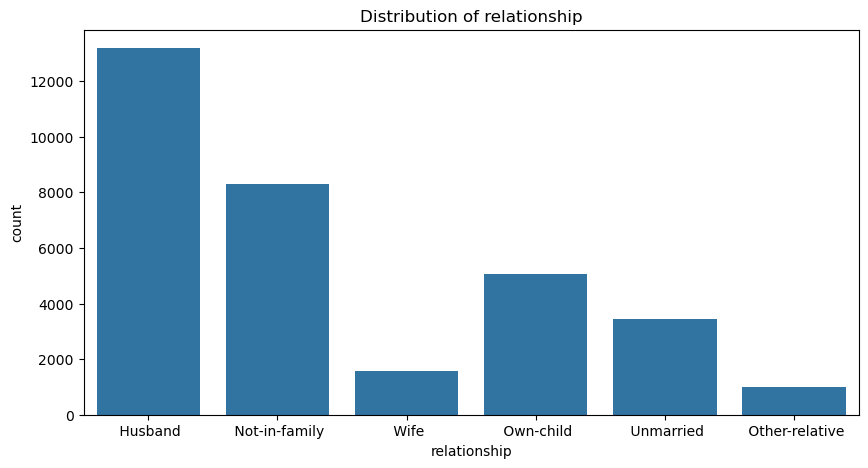

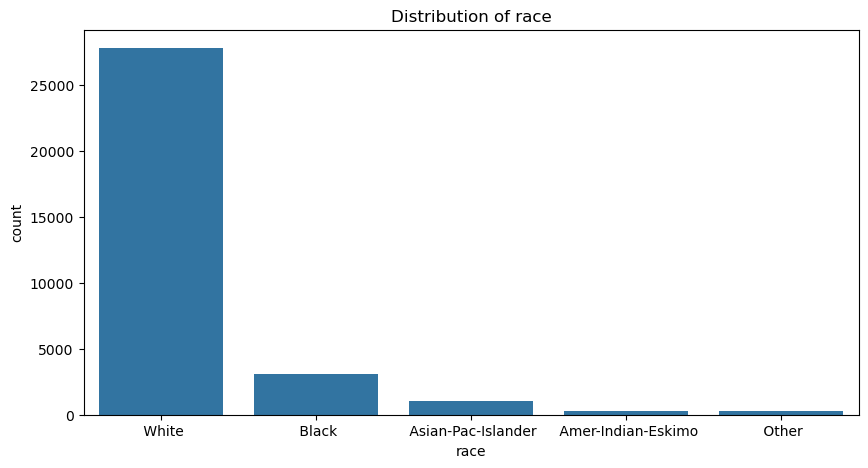

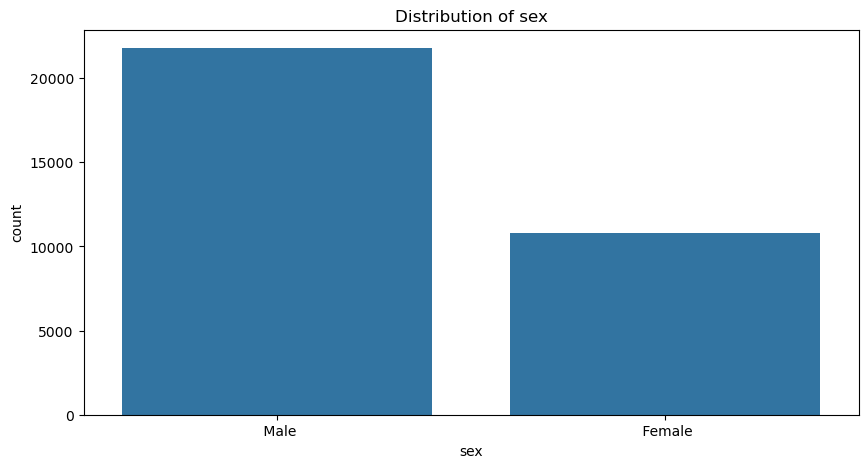

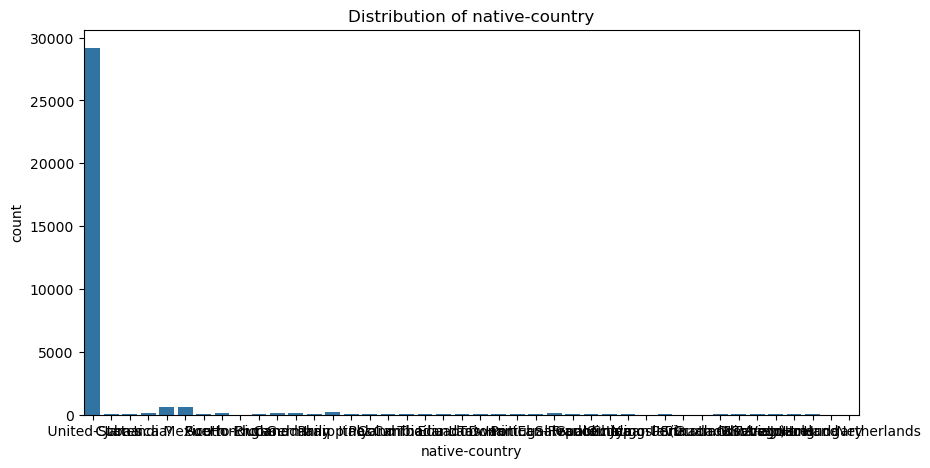

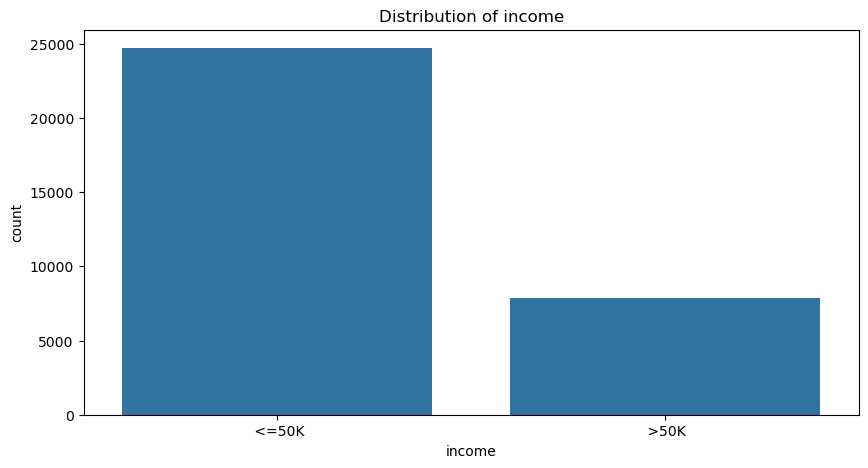

In [6]:
#bar chart of all categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    
    plt.show()

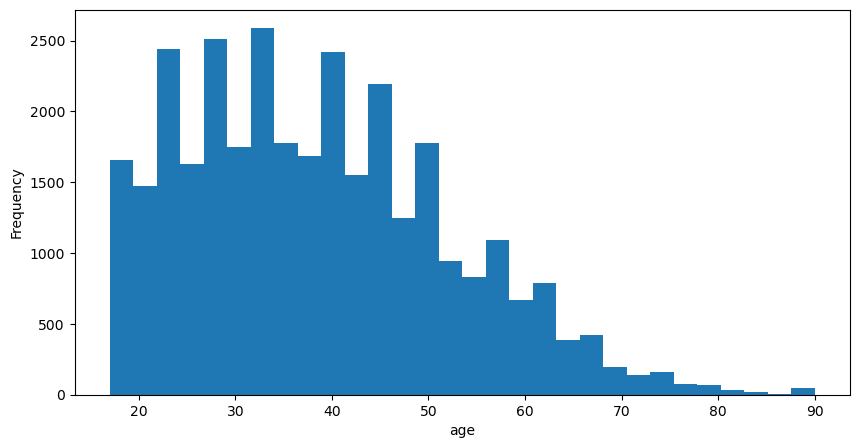

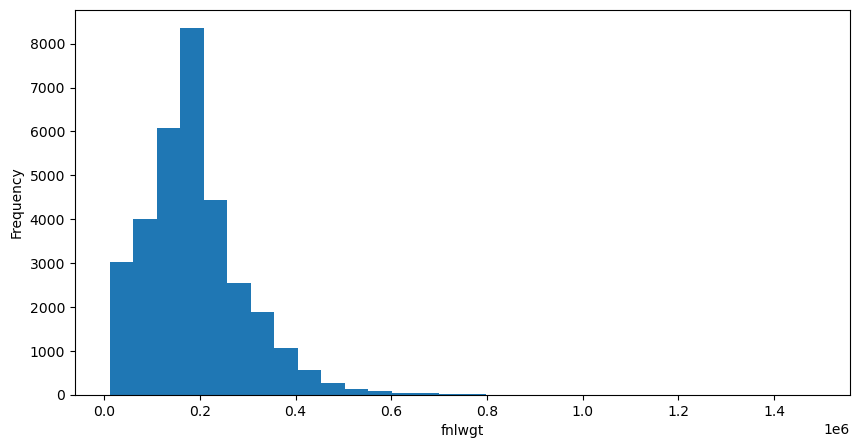

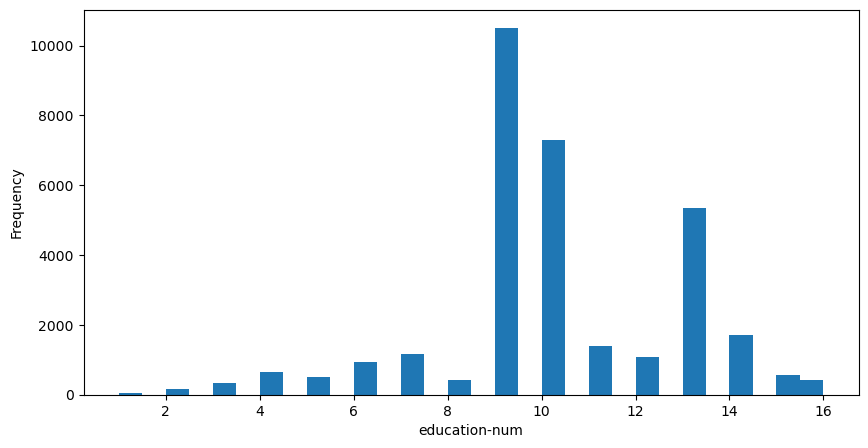

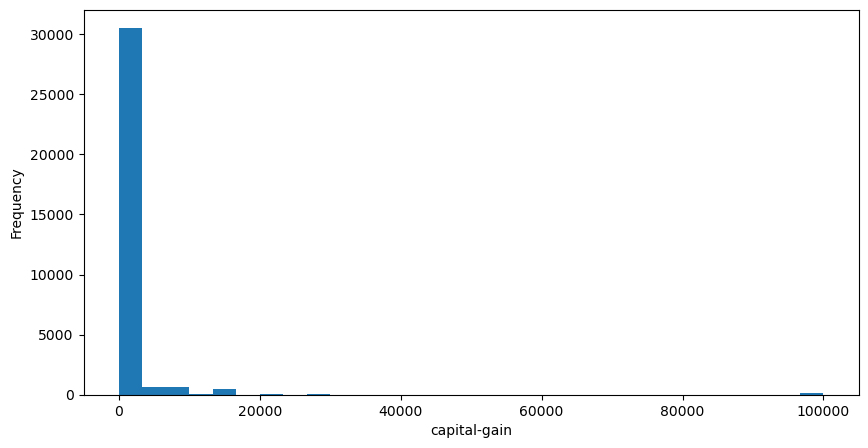

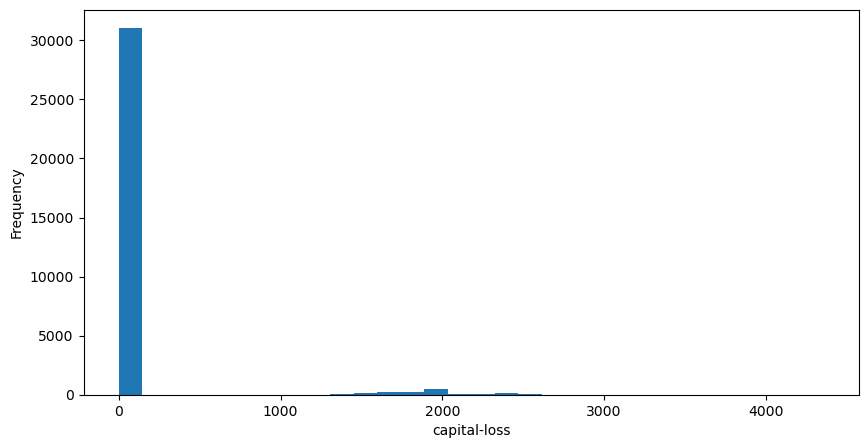

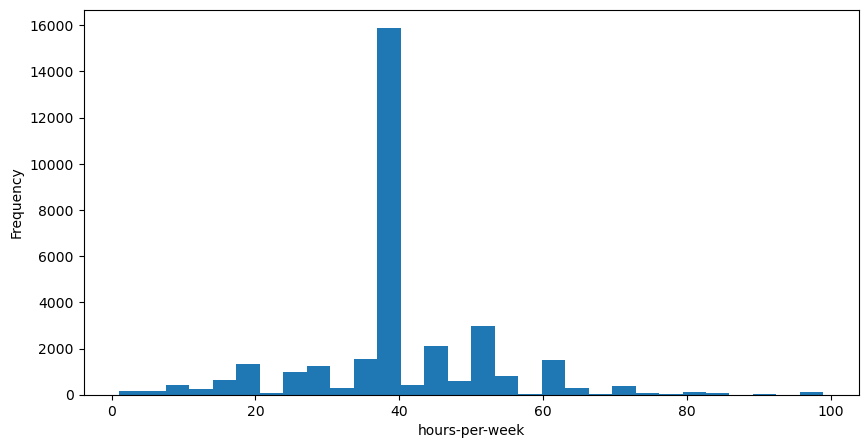

In [7]:
#histograms of all numerical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    plt.hist(df[feature], bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

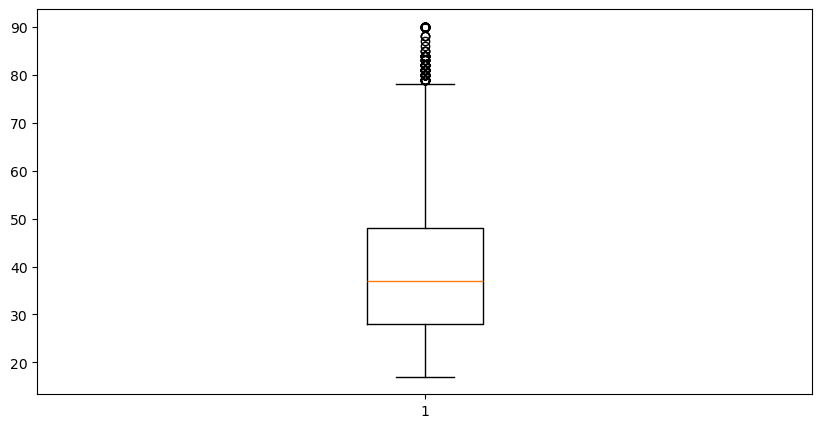

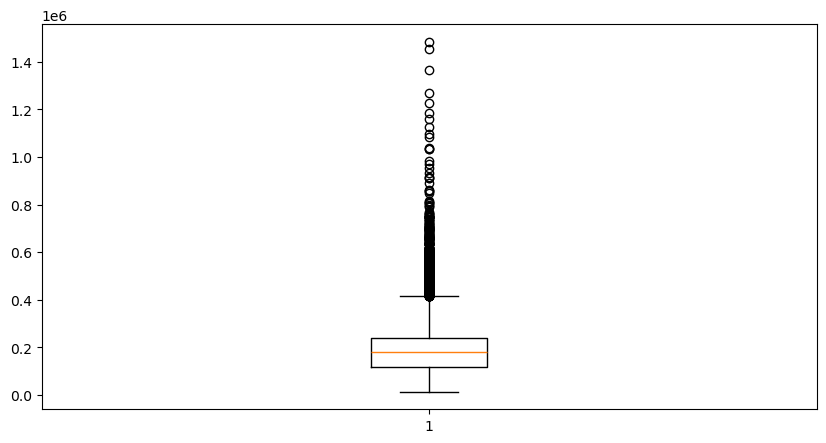

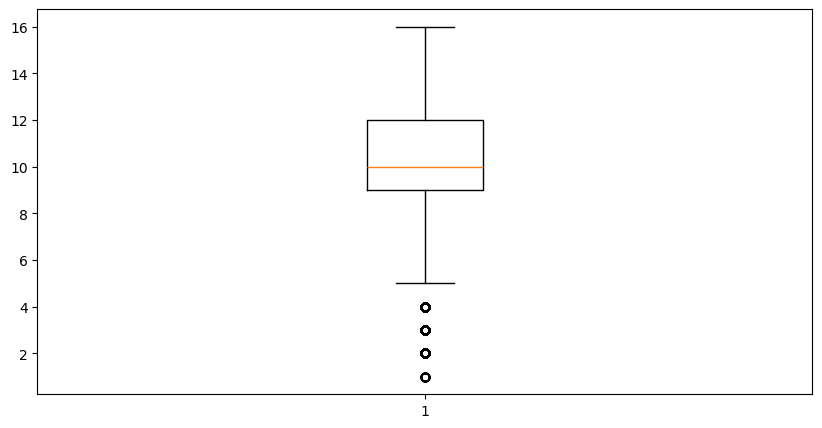

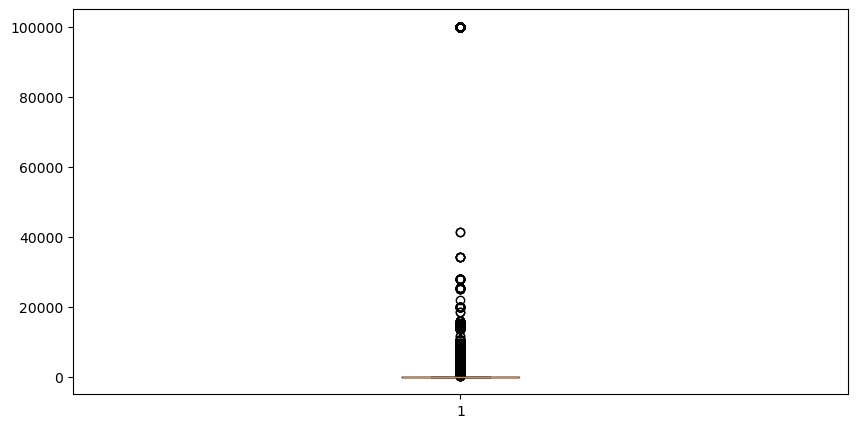

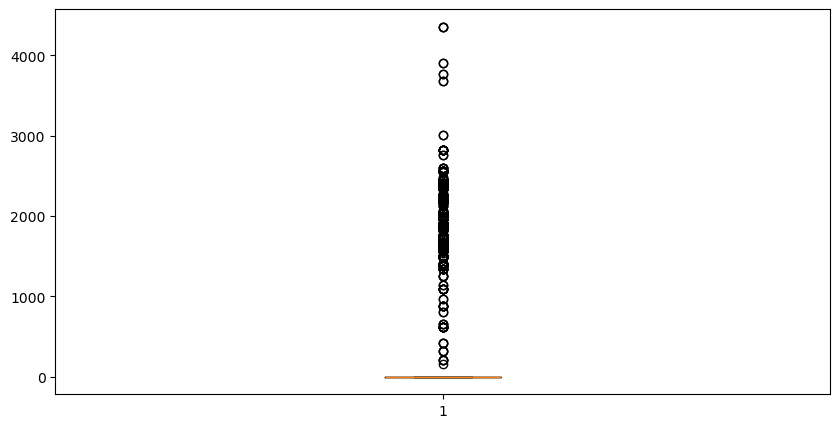

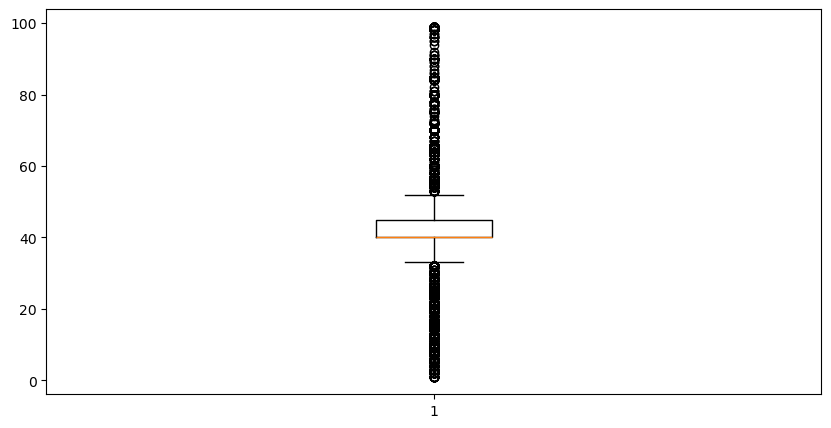

In [8]:
#plot outliers
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[feature]) 
    plt.show()

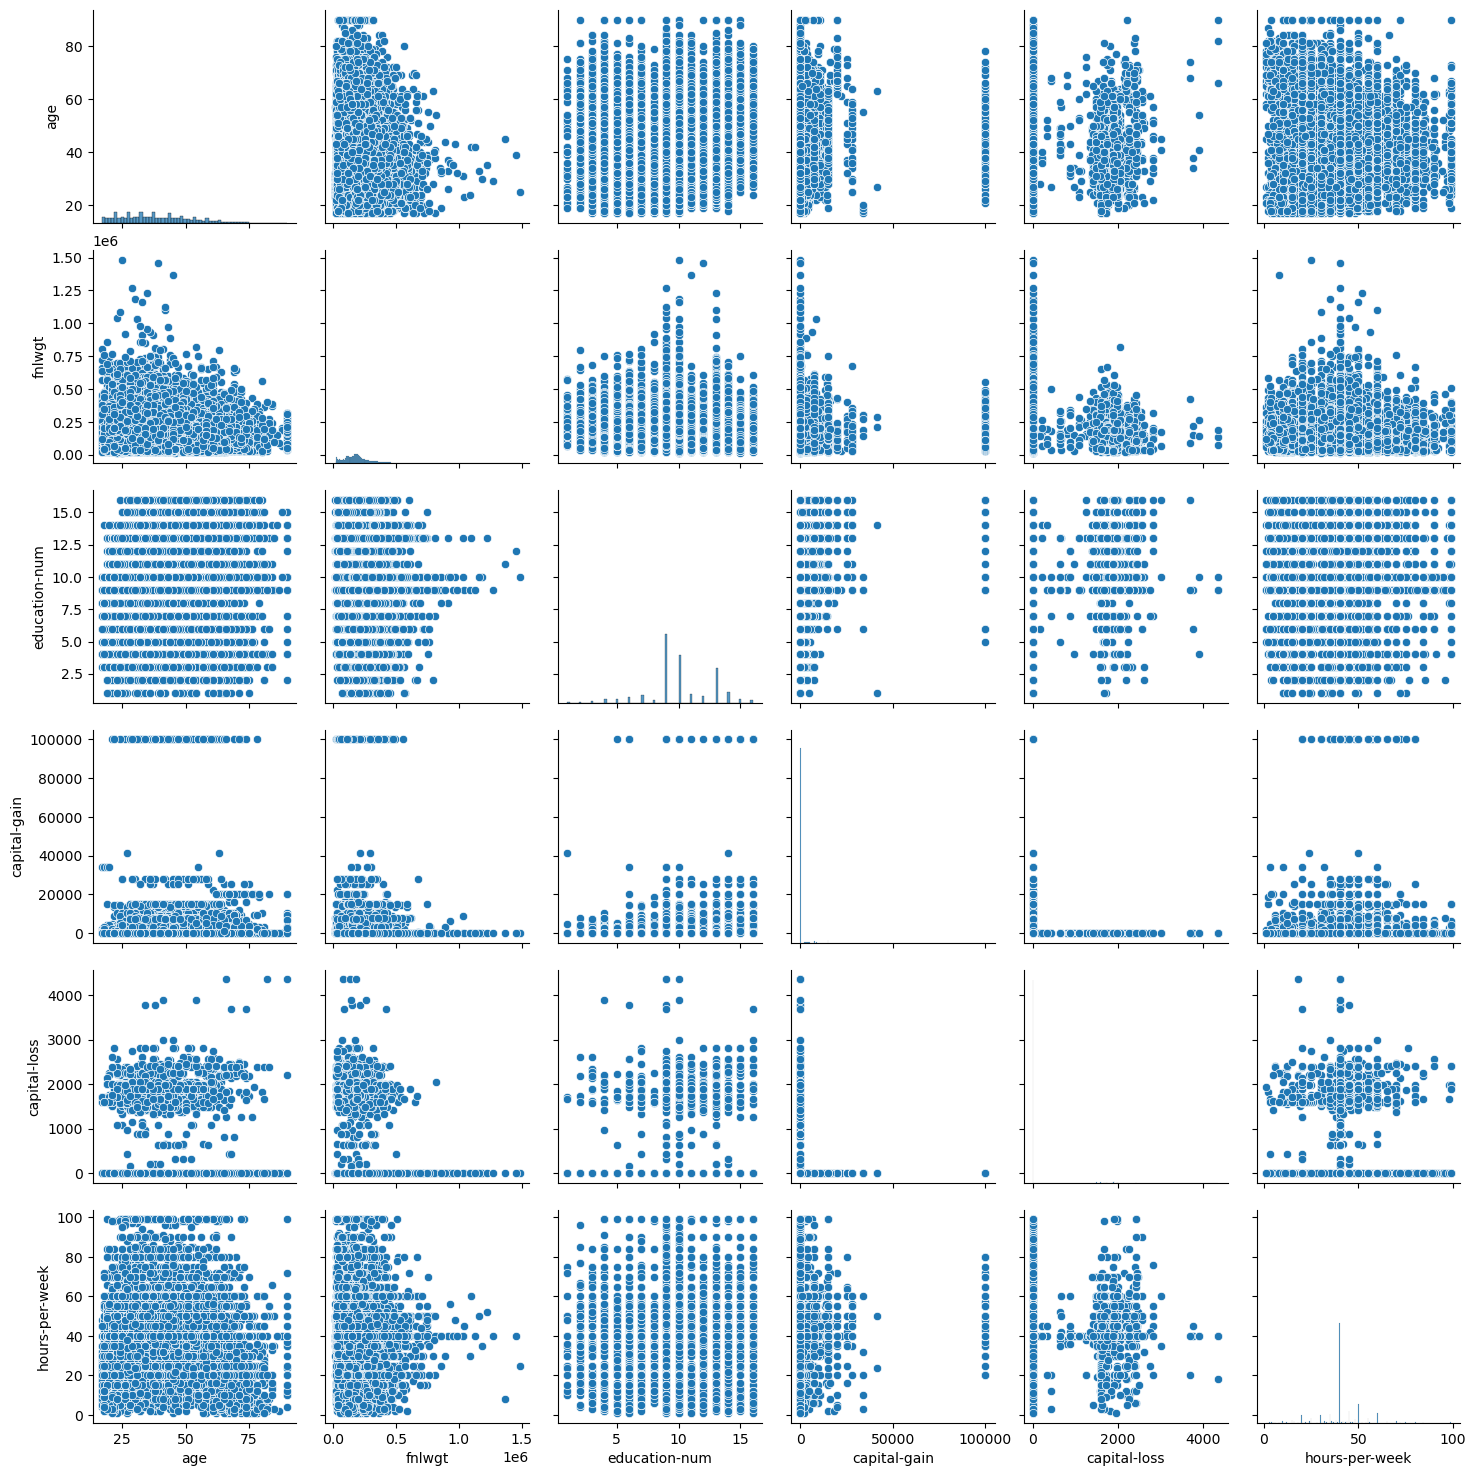

In [9]:
#pairplot
sns.pairplot(df)
plt.show()

In [10]:
# handle missing values
df.replace('?', np.nan, inplace=True)
df = df.dropna()

Baseline Model(before data processing and feature engineering)

In [11]:
X = df.drop('income', axis=1)
y = df['income']               

In [ ]:
#select features and target
y = df['income']
## One-Hot Encoding
X = pd.get_dummies(X,drop_first=True)
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32556,40,154374,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,58,151910,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32558,22,201490,9,0,0,20,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [14]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=2025) 
logr.fit(X_train, y_train)
from scipy.stats import randint, uniform

param_dist_logr = {
    'C': [0.01, 1, 100], 
    'class_weight': [None, "balanced"] 
}

from sklearn.model_selection import RandomizedSearchCV
rs_logr = RandomizedSearchCV(
    estimator = logr, 
    param_distributions = param_dist_logr,
    cv = 4, ## Number of cross-validation folds
    scoring = 'f1', ## Scoring metric
    n_iter = 5, ## Number of parameter settings sampled
    n_jobs = -1 ## -1: Use all available cores
    )

rs_logr.fit(X_train, y_train)

## Obtain best parameters and best estimator
best_rs_params = rs_logr.best_params_
best_rs_logr = rs_logr.best_estimator_
print("Best Parameters: ", best_rs_params)
print("Best Estimator: ", best_rs_logr)

c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


Best Parameters:  {'class_weight': 'balanced', 'C': 100}
Best Estimator:  LogisticRegression(C=100, class_weight='balanced', random_state=2025)


c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#baseline model evaluation
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_rs_logr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))    

[[4972 2423]
 [ 925 1448]]
              precision    recall  f1-score   support

       <=50K       0.84      0.67      0.75      7395
        >50K       0.37      0.61      0.46      2373

    accuracy                           0.66      9768
   macro avg       0.61      0.64      0.61      9768
weighted avg       0.73      0.66      0.68      9768



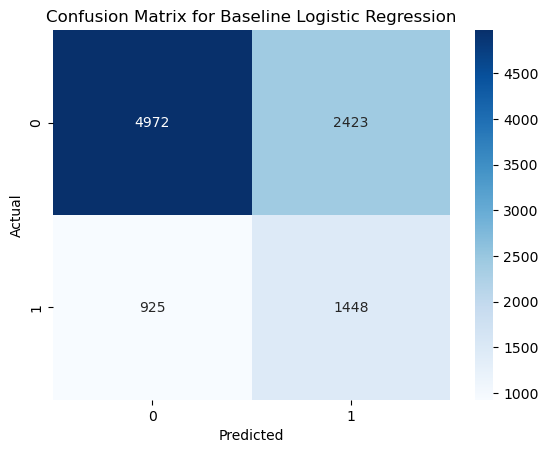

In [16]:
# confusion matrix for baseline model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Baseline Logistic Regression')
plt.show()

Data Processing


In [17]:
# binning education categories
df['education'] = df['education'].replace({'9th': '9th-10th', '10th': '9th-10th', '11th': '11th-12th', '12th': '11th-12th', 'Masters': 'Post-Grad', 'Doctorate': 'Post-Grad'})

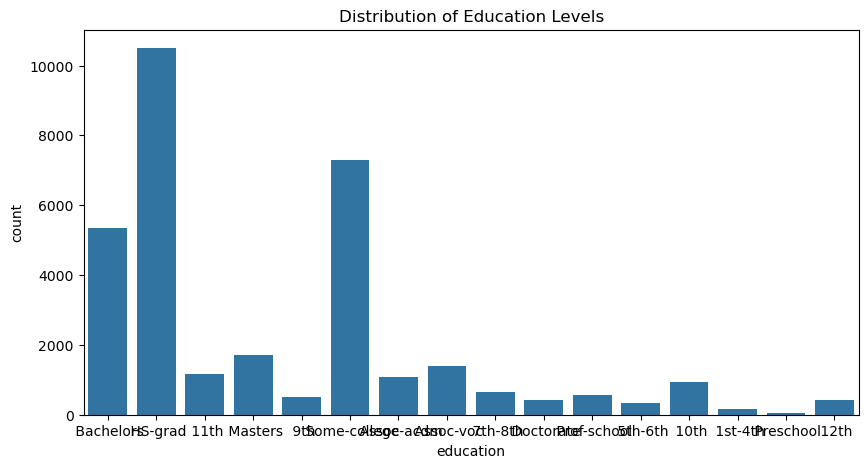

In [18]:
# display binned education categories in a chart
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x='education')
plt.title('Distribution of Education Levels')
plt.show()

In [19]:
# binning country of origin
df['native-country'] = df['native-country'].replace({'United-States': 'USA', 'Canada': 'North America', 'Mexico': 'North America', 'Puerto-Rico': 'Caribbean', 'Cuba': 'Caribbean', 'Dominican-Republic': 'Caribbean', 'Columbia': 'South America', 'Ecuador': 'South America', 'Peru': 'South America', 'El-Salvador': 'Central America', 'Guatemala': 'Central America', 'Honduras': 'Central America', 'Nicaragua': 'Central America', 'Jamaica': 'Caribbean', 'Trinadad&Tobago': 'Caribbean', 'Haiti': 'Caribbean', 'Philippines': 'Asia', 'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia', 'Vietnam': 'Asia', 'South Korea': 'Asia', 'Taiwan': 'Asia', 'Iran': 'Middle East', 'Iraq': 'Middle East', 'Turkey': 'Middle East', 'Lebanon': 'Middle East'})

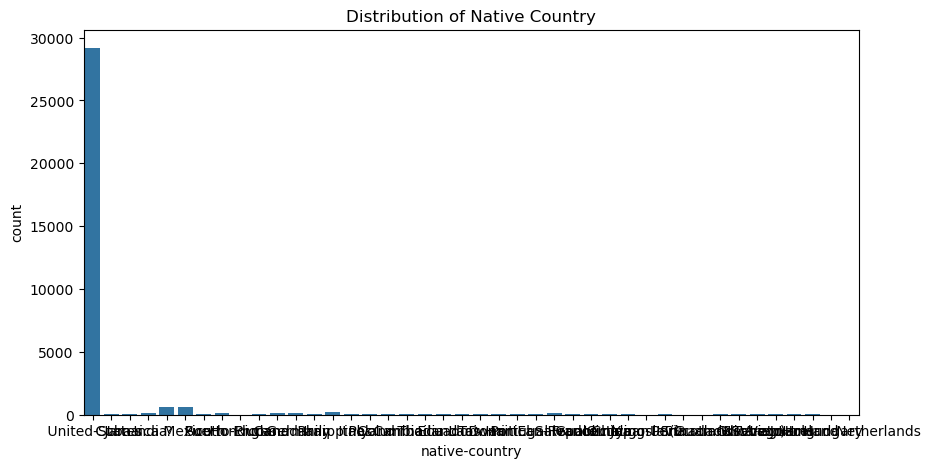

In [20]:
#display new categories in a chart
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='native-country')
plt.title('Distribution of Native Country')
plt.show()


In [21]:
#train new logistic regression model with binned features
X = df.drop('income', axis=1)
y = df['income']
X = pd.get_dummies(X,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)
logr = LogisticRegression(random_state=2025) 
logr.fit(X_train, y_train)

c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2025
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
#evaluating new model
y_pred = logr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7068  327]
 [1654  719]]
              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88      7395
        >50K       0.69      0.30      0.42      2373

    accuracy                           0.80      9768
   macro avg       0.75      0.63      0.65      9768
weighted avg       0.78      0.80      0.77      9768



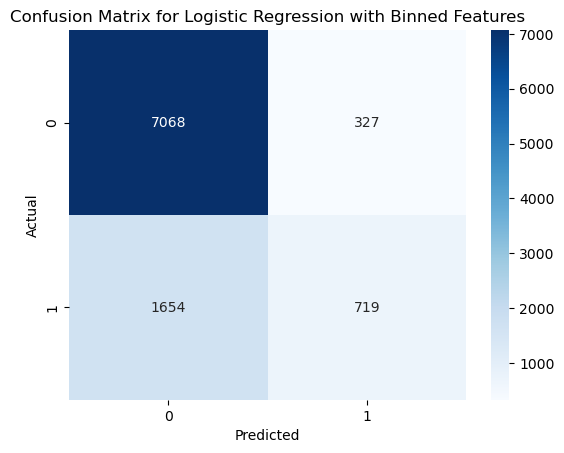

In [23]:
# confusion matrix for new model
from sklearn.metrics import confusion_matrix    
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with Binned Features')
plt.show()

## Analysis of feature engineering on model performace
There was an improvement in all evaluation metrics(precision,recall,accuracy) after feature engineering

In [24]:
# train decision tree model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2025)
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
#evaluate decision tree model
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6499  896]
 [ 911 1462]]
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7395
        >50K       0.62      0.62      0.62      2373

    accuracy                           0.82      9768
   macro avg       0.75      0.75      0.75      9768
weighted avg       0.81      0.82      0.81      9768



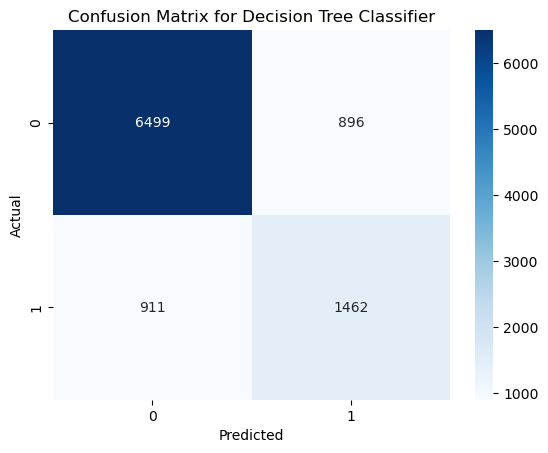

In [26]:
# confusion matrix for tree model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [27]:
# hyperparameter tuning for decision tree
from sklearn.model_selection import GridSearchCV
param_grid_dtc = {
    'max_depth': [10, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ["balanced", {0: 2, 1: 1}, {0: 5, 1: 1}, {0: 10, 1: 1},{0: 20, 1: 1}]
}

#train new decision tree model with best hyperparameters
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, cv=4, scoring='f1', n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)
best_dtc = grid_search_dtc.best_estimator_
y_pred = best_dtc.predict(X_test)


c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
720 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\greyh\miniconda3\envs\mldp\Lib\site-packages\sklearn\tree\_classes

In [28]:
# evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5717 1678]
 [ 330 2043]]
              precision    recall  f1-score   support

       <=50K       0.95      0.77      0.85      7395
        >50K       0.55      0.86      0.67      2373

    accuracy                           0.79      9768
   macro avg       0.75      0.82      0.76      9768
weighted avg       0.85      0.79      0.81      9768



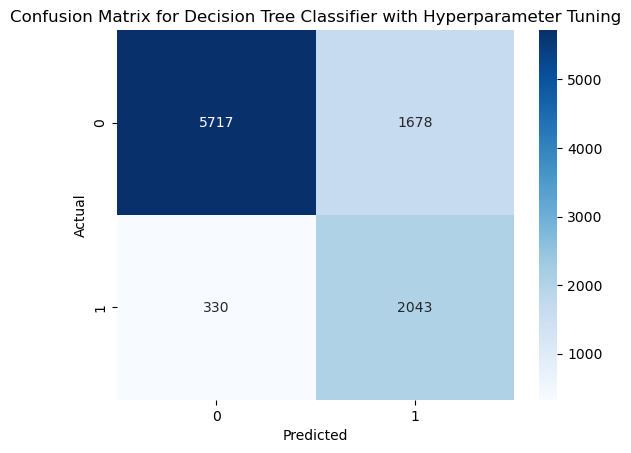

In [29]:
#confusion matrix for new tree model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier with Hyperparameter Tuning')
plt.show()


## Final Analysis and Justification
I would use the final decision tree model for my use case. although it has a lower precision(55%) for the category income <50k, it has the highest recall(86%) for that catergory out of all models while still having a higher accuracy than the baseline linear regression model.
This allows the model to better dectect those with lower income, which is useful for a case where we need to identify low income indidivduals in order to provide them with any neccessary relief.

The main difference between the two decision tree models is the use of class weights, which increases the penalty for false negatives in this case. This is because of the higher cost of missing out on people who need aid while a false positive result in minor delays during addtional human review.

The class weight is also helpful to correct imbalances in the dataset, where most of the respondents earns above 50k. This prevents overfitting where the model always guesses that the participant earns above 50k and render the model less effective.

In [ ]:
# save selected model
joblib.dump(best_dtc, 'model.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['best_decision_tree_model.pkl']